# My US Medical Insurance Project

In this project I will be analysing US medical insurance data to determine some key correlations between various attributes within insurance.csv to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

First I import my insurance file using the Pandas pd formula and bring up the first 10 lines to get an idea of the data I am analysing.

In [160]:
import pandas as pd

In [161]:
df = pd.read_csv('C:/Users/alecw/Projects/US medical Insurance project/python-portfolio-project-starter-files/python-portfolio-project-starter-files/insurance.csv')


In [162]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Data Information

Next we'll look at some key data information that will help us determine the scope of the project.

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The above tells us that we have 1338 entries with data spanning 7 colunms. 

In [164]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Using the df.describe built in pandas feature I can easily obtain key insights into the data. These include:

- The avergage ages of all patients is 39.21.
- The range of ages varies from 18 years to 62 years.
- The maximum insurance cost is 63770 dollars.
- The minimum insruance cost is 1122 dollars.
- The average charge of insurance is 13270 dollars.


This data will allow me to easily compare key insights I will uncover later in my project.

## Correlations

In this section I will look at correlations between the following varibles:

- The change in ages and effect on the cost of insurance
- The change in BMI and the effect on the cost of insurance
- The change in insurance cost for smokers and non-smokers.

I will use a number of methods to find and present my data including:
* Pandas
* Python
* Seaborn

In [165]:
import seaborn as sns

### Ages and costs

Below I am using a scatter plot to see the correlation between ages and insurance cost. 
It appears that there is a positive correlation between the two variables, meaning that as age increases, so do the medical charges. There are a few outliers in the plot, with some individuals having higher than average charges and some older individuals having lower than average charges. The plot also shows a cluster of data points around the lower age and lower charge range, indicating that there are many younger individuals in the dataset with relatively low medical charges. Overall, the plot suggests that age is a significant factor in determining medical charges.

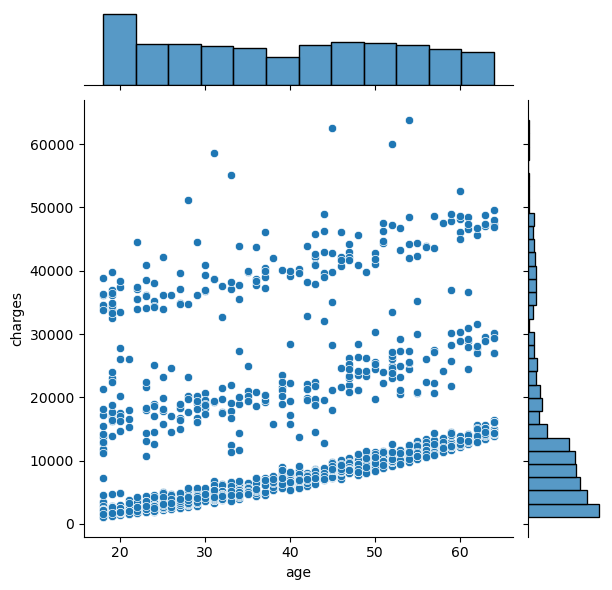

In [166]:
sns.jointplot(x='age', y='charges', data=df)

To show further the difference in cost by age, I've used the Pandas groupby action to determine the change in average costs of insurance in increments of 5.
The data shows a clear correlation between the age of a client and their insurance cost with insurance cost increased with age. The increase seems to increae quicker when reaching the maximum age. 

In [167]:
ages_costs = df.groupby(pd.cut(df['age'], bins=range(18, df['age'].max()+10, 5)))['charges'].mean()

print('The average cost for ages 18 - 22 is:', round(ages_costs[0], 2))
print('The average cost for ages 23 - 27 is:', round(ages_costs[1], 2))
print('The average cost for ages 28 - 32 is:', round(ages_costs[2], 2))
print('The average cost for ages 33 - 37 is:', round(ages_costs[3], 2))
print('The average cost for ages 38 - 42 is:', round(ages_costs[4], 2))
print('The average cost for ages 43 - 47 is:', round(ages_costs[5], 2))
print('The average cost for ages 48 - 52 is:', round(ages_costs[6], 2))
print('The average cost for ages 53 - 57 is:', round(ages_costs[7], 2))
print('The average cost for ages 58 - 62 is:', round(ages_costs[8], 2))
print('The average cost for ages 62 - 66 is:', round(ages_costs[9], 2))

The average cost for ages 18 - 22 is: 9492.04
The average cost for ages 23 - 27 is: 9574.82
The average cost for ages 28 - 32 is: 10986.59
The average cost for ages 33 - 37 is: 12244.52
The average cost for ages 38 - 42 is: 13126.49
The average cost for ages 43 - 47 is: 15458.2
The average cost for ages 48 - 52 is: 15681.95
The average cost for ages 53 - 57 is: 16112.83
The average cost for ages 58 - 62 is: 20364.18
The average cost for ages 62 - 66 is: 23275.53


### BMI and costs

Again, using Seaborn scatter plots, I can see the correlation of BMI and the effect on insurance costs. 

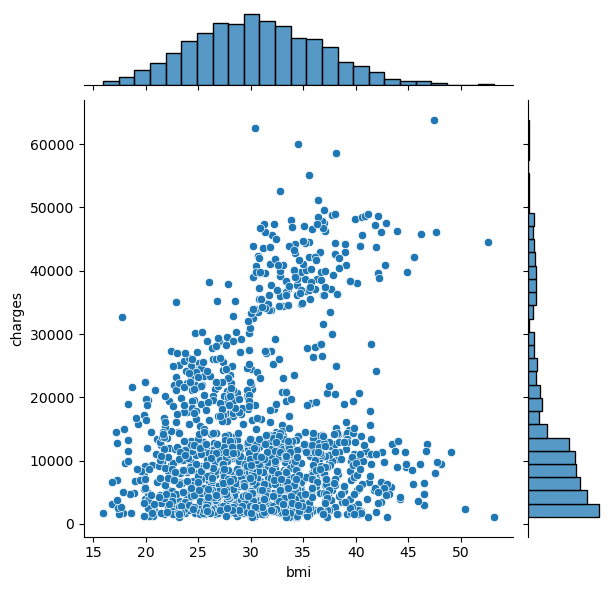

In [168]:
sns.jointplot(x='bmi', y='charges', data=df)

### Smoker and costs

In this last section I will look at the correlation between smokers and non-smokers and how this will affect their insurance costs. 
I've used a variety of methods to cross-check my findings. 
Firstly, I have used a box plot below to visualize the correlation. The box plot clearly shows a huge difference in insurance cost for smokers, with a much higher median. The smokers also have a much larger interquartile range, indicating a much larger spread in insurance costs; this range may indicate that insurance costs for smokers are more varied and harder to predict. 

<AxesSubplot:xlabel='smoker', ylabel='charges'>

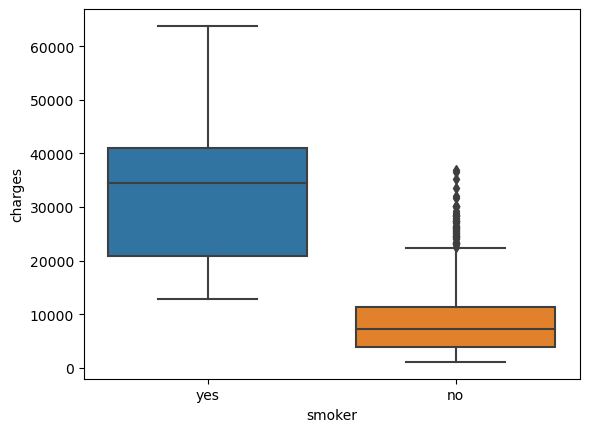

In [169]:
sns.boxplot(x='smoker', y='charges', data=df)

Next I will use Pandas to determine the average cost of insurance for smokers and non-smokers. 

In [170]:
smoker_costs = df.groupby('smoker')['charges'].mean()

print('The average cost for non-smokers is:', round(smoker_costs[0], 2))
print('The average cost for smokers is:', round(smoker_costs[1], 2))

The average cost for non-smokers is: 8434.27
The average cost for smokers is: 32050.23


In this next section I will use Python to confirm my findings with Pandas above.

Firstly, I will import CSV and create lists to neatly store all the information in my file. 

In [171]:
import csv

In [172]:
ages = []
sexes = []
bmis = []
num_children = []
smoker_statuses = []
regions = []
insurance_charges = []

In [173]:
def load_list_data(lst, csv_file, column_name):
    # open csv file
    with open(csv_file) as csv_info:
        # read the data from the csv file
        csv_dict = csv.DictReader(csv_info)
        # loop through the data in each row of the csv 
        for row in csv_dict:
            # add the data from each row to a list
            lst.append(row[column_name])
        # return the list
        return lst

In [174]:
load_list_data(ages, 'C:/Users/alecw/Projects/US medical Insurance project/python-portfolio-project-starter-files/python-portfolio-project-starter-files/insurance.csv', 'age')
load_list_data(sexes, 'C:/Users/alecw/Projects/US medical Insurance project/python-portfolio-project-starter-files/python-portfolio-project-starter-files/insurance.csv', 'sex')
load_list_data(bmis, 'C:/Users/alecw/Projects/US medical Insurance project/python-portfolio-project-starter-files/python-portfolio-project-starter-files/insurance.csv', 'bmi')
load_list_data(num_children, 'C:/Users/alecw/Projects/US medical Insurance project/python-portfolio-project-starter-files/python-portfolio-project-starter-files/insurance.csv', 'children')
load_list_data(smoker_statuses, 'C:/Users/alecw/Projects/US medical Insurance project/python-portfolio-project-starter-files/python-portfolio-project-starter-files/insurance.csv', 'smoker')
load_list_data(regions, 'C:/Users/alecw/Projects/US medical Insurance project/python-portfolio-project-starter-files/python-portfolio-project-starter-files/insurance.csv', 'region')
load_list_data(insurance_charges, 'C:/Users/alecw/Projects/US medical Insurance project/python-portfolio-project-starter-files/python-portfolio-project-starter-files/insurance.csv', 'charges')

['16884.924',
 '1725.5523',
 '4449.462',
 '21984.47061',
 '3866.8552',
 '3756.6216',
 '8240.5896',
 '7281.5056',
 '6406.4107',
 '28923.13692',
 '2721.3208',
 '27808.7251',
 '1826.843',
 '11090.7178',
 '39611.7577',
 '1837.237',
 '10797.3362',
 '2395.17155',
 '10602.385',
 '36837.467',
 '13228.84695',
 '4149.736',
 '1137.011',
 '37701.8768',
 '6203.90175',
 '14001.1338',
 '14451.83515',
 '12268.63225',
 '2775.19215',
 '38711',
 '35585.576',
 '2198.18985',
 '4687.797',
 '13770.0979',
 '51194.55914',
 '1625.43375',
 '15612.19335',
 '2302.3',
 '39774.2763',
 '48173.361',
 '3046.062',
 '4949.7587',
 '6272.4772',
 '6313.759',
 '6079.6715',
 '20630.28351',
 '3393.35635',
 '3556.9223',
 '12629.8967',
 '38709.176',
 '2211.13075',
 '3579.8287',
 '23568.272',
 '37742.5757',
 '8059.6791',
 '47496.49445',
 '13607.36875',
 '34303.1672',
 '23244.7902',
 '5989.52365',
 '8606.2174',
 '4504.6624',
 '30166.61817',
 '4133.64165',
 '14711.7438',
 '1743.214',
 '14235.072',
 '6389.37785',
 '5920.1041',
 '176

Next I will create a class and define my function analyse_smokers. This will iterate through the data to determine the average cost for both smokers and non-smokers. 

In [175]:
class PatientsInfo:
    def __init__(self, patients_ages, patients_sexes, patients_bmis, patients_num_children, 
                 patients_smoker_statuses, patients_regions, patients_charges):
        self.patients_ages = patients_ages
        self.patients_sexes = patients_sexes
        self.patients_bmis = patients_bmis
        self.patients_num_children = patients_num_children
        self.patients_smoker_statuses = patients_smoker_statuses
        self.patients_regions = patients_regions
        self.patients_charges = patients_charges

    def analyse_smokers(self):
        num_of_yes = 0
        total_charge_yes = 0
        num_of_no = 0
        total_charge_no = 0

        for i in range(len(self.patients_smoker_statuses)):
            if self.patients_smoker_statuses[i] == 'yes':
                num_of_yes += 1
                total_charge_yes += float(self.patients_charges[i])
            else:
                num_of_no += 1
                total_charge_no += float(self.patients_charges[i])

        avg_smoker = total_charge_yes / num_of_yes if num_of_yes > 0 else 0
        avg_nonsmoker = total_charge_no / num_of_no if num_of_no > 0 else 0

        print(f"The average insurance cost for smokers is: ${avg_smoker:.2f}")
        print(f"The average insurance cost for non-smokers is: ${avg_nonsmoker:.2f}")

        return avg_smoker, avg_nonsmoker

In [176]:
patient_info = PatientsInfo(ages, sexes, bmis, num_children, smoker_statuses, regions, insurance_charges)

In [177]:
patient_info.analyse_smokers()

The average insurance cost for smokers is: $32050.23
The average insurance cost for non-smokers is: $8434.27


(32050.23183153285, 8434.268297856199)

It is clear using the three methods above that there is a very strong relationship between being a smoker and having a higher insurance cost, with an overall difference of $23,616.

### Bias

When analyzing the insurance dataset, it’s crucial to be mindful of potential biases that could affect its reliability and applicability. Two key areas of concern include:

Geographic Bias:
The dataset includes individuals from only four regions within the United States. This limited geographic scope may reduce the generalizability of findings to other areas, both within and outside the U.S. For instance, medical expenses can vary widely by location, so insights drawn from this dataset may not accurately reflect conditions in unrepresented regions.

Sampling Bias:
The dataset may not accurately reflect the broader population. It could, for example, disproportionately include individuals with specific health conditions or exclude those from certain socioeconomic backgrounds. These imbalances can skew analysis outcomes and limit the dataset’s value for broader or more inclusive research questions.
